In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import norm

In [18]:
# Defining the functions calculating the probability that each bet is realised. The probability is that of a Normal random variable with mean equal to the forecast, and variance equal to the variance of the sum of h white noises (i.e. h*sigma^2).
# Since the payoff is 1, this is also equivalent to the expected payoff of the bet. If this is larger than the price paid for the bet, then the bet is profitable.

def up_bet(forecast, K, sigma, h):
    return 1 - norm.cdf(K, forecast, sigma*np.sqrt(h))

def down_bet(forecast, K, sigma, h):
    return norm.cdf(K, forecast, sigma*np.sqrt(h))

def range_bet(forecast, K_low, K_high, sigma, h):
    return down_bet(forecast, K_high, sigma, h) * up_bet(forecast, K_low, sigma, h)

def out_range_bet(forecast, K_low, K_high, sigma, h):
    return 1 - range_bet(forecast, K_low, K_high, sigma, h)


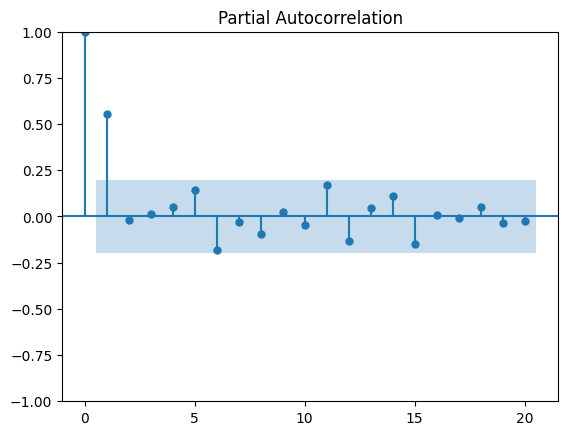

In [4]:
df1 = pd.read_csv('dataset1.csv')

    # 2. Select the AR lag using the PACF
plot_pacf(df1, lags=20)
plt.show() # This shows that the first dataset has p=1 as its optimal lag choice

In [5]:
# fit an AR(p) model
p=1
model1 = ARIMA(df1, order=(p, 0, 0))
fitted_model1 = model1.fit()

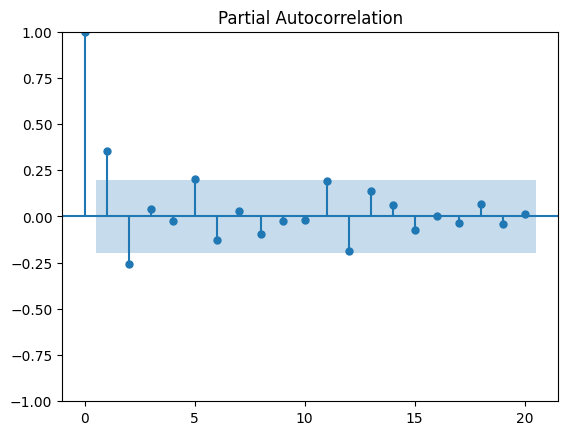

In [6]:
df2 = pd.read_csv('dataset2.csv')

    # 2. Select the AR lag using the PACF
plot_pacf(df2, lags=20)
plt.show() # This shows that the second dataset has either p=2 or p=5 as its optimal lag choice. We go with p=5 to be conservative

In [7]:
# fit an AR(p) model
p=5
model2 = ARIMA(df2, order=(p, 0, 0))
fitted_model2 = model2.fit()

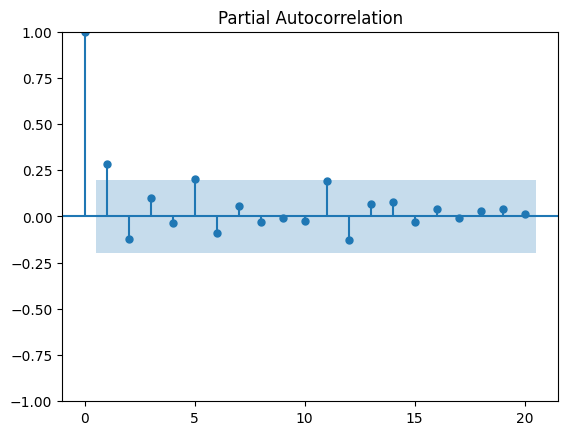

In [8]:
df3 = pd.read_csv('dataset3.csv')

    # 2. Select the AR lag using the PACF
plot_pacf(df3, lags=20)
plt.show() # This shows that the third dataset has p=5 as its optimal lag choice.

In [9]:
# fit an AR(p) model
p=5
model3 = ARIMA(df3, order=(p, 0, 0))
fitted_model3 = model3.fit()

In [10]:
fitted_model1.forecast(steps=1).values[0]

-1.0273438369866061

In [19]:
h_values = [1, 3, 7]

exp_payoffs = np.zeros((3,4,3)) # set up an expected payoff matrix for each dataset, each bet type, and each h value

for i,h in enumerate(h_values):
    forecast1 = fitted_model1.forecast(steps=h).values[0] # get the h-step ahead forecast
    sigma1 = np.sqrt(fitted_model1.params.sigma2) # get the error on the forecast
    forecast2 = fitted_model2.forecast(steps=h).values[0]
    sigma2 = np.sqrt(fitted_model2.params.sigma2)
    forecast3 = fitted_model3.forecast(steps=h).values[0]
    sigma3 = np.sqrt(fitted_model3.params.sigma2)

    exp_payoffs[0,0,i] = up_bet(forecast1, 0, sigma1, h)
    exp_payoffs[0,1,i] = down_bet(forecast1, 0, sigma1, h)
    exp_payoffs[0,2,i] = range_bet(forecast1, -0.2, 0.2, sigma1, h)
    exp_payoffs[0,3,i] = out_range_bet(forecast1, -0.2, 0.2, sigma1, h)

    exp_payoffs[1,0,i] = up_bet(forecast2, 0, sigma2, h)
    exp_payoffs[1,1,i] = down_bet(forecast2, 0, sigma2, h)
    exp_payoffs[1,2,i] = range_bet(forecast2, -0.2, 0.2, sigma2, h)
    exp_payoffs[1,3,i] = out_range_bet(forecast2, -0.2, 0.2, sigma2, h)

    exp_payoffs[2,0,i] = up_bet(forecast3, 0, sigma3, h)
    exp_payoffs[2,1,i] = down_bet(forecast3, 0, sigma3, h)
    exp_payoffs[2,2,i] = range_bet(forecast3, -0.2, 0.2, sigma3, h)
    exp_payoffs[2,3,i] = out_range_bet(forecast3, -0.2, 0.2, sigma3, h)

print("Dataset 1")
print(f"Bet 1: Up at h=1 - Expected payoff for dataset 1: {exp_payoffs[0,0,0]:.3f}, cost is 0.5")
print(f"Bet 2: Down at h=1 - Expected payoff for dataset 1: {exp_payoffs[0,1,0]:.3f}, cost is 0.5")
print(f"Bet 3: In-Range at h=3 - Expected payoff for dataset 1: {exp_payoffs[0,2,1]:.3f}, cost is 0.0.092")
print(f"Bet 4: Out-Range at h=3 - Expected payoff for dataset 1: {exp_payoffs[0,3,1]:.3f}, cost is 0.908")
print(f"Bet 5: Up at h=7 - Expected payoff for dataset 1: {exp_payoffs[0,0,2]:.3f}, cost is 0.5")
print(f"Bet 6: In-Range at h=7 - Expected payoff for dataset 1: {exp_payoffs[0,2,2]:.3f}, cost is 0.06")

print("Dataset 2")
print(f"Bet 1: Up at h=1 - Expected payoff for dataset 2: {exp_payoffs[1,0,0]:.3f}, cost is 0.5")
print(f"Bet 2: Down at h=1 - Expected payoff for dataset 2: {exp_payoffs[1,1,0]:.3f}, cost is 0.5")
print(f"Bet 3: In-Range at h=3 - Expected payoff for dataset 2: {exp_payoffs[1,2,1]:.3f}, cost is 0.0.092")
print(f"Bet 4: Out-Range at h=3 - Expected payoff for dataset 2: {exp_payoffs[1,3,1]:.3f}, cost is 0.908")
print(f"Bet 5: Up at h=7 - Expected payoff for dataset 2: {exp_payoffs[1,0,2]:.3f}, cost is 0.5")
print(f"Bet 6: In-Range at h=7 - Expected payoff for dataset 2: {exp_payoffs[1,2,2]:.3f}, cost is 0.06")

print("Dataset 3")
print(f"Bet 1: Up at h=1 - Expected payoff for dataset 3: {exp_payoffs[2,0,0]:.3f}, cost is 0.5")
print(f"Bet 2: Down at h=1 - Expected payoff for dataset 3: {exp_payoffs[2,1,0]:.3f}, cost is 0.5")
print(f"Bet 3: In-Range at h=3 - Expected payoff for dataset 3: {exp_payoffs[2,2,1]:.3f}, cost is 0.0.092")
print(f"Bet 4: Out-Range at h=3 - Expected payoff for dataset 3: {exp_payoffs[2,3,1]:.3f}, cost is 0.908")
print(f"Bet 5: Up at h=7 - Expected payoff for dataset 3: {exp_payoffs[2,0,2]:.3f}, cost is 0.5")
print(f"Bet 6: In-Range at h=7 - Expected payoff for dataset 3: {exp_payoffs[2,2,2]:.3f}, cost is 0.06")

Dataset 1
Bet 1: Up at h=1 - Expected payoff for dataset 1: 0.130, cost is 0.5
Bet 2: Down at h=1 - Expected payoff for dataset 1: 0.870, cost is 0.5
Bet 3: In-Range at h=3 - Expected payoff for dataset 1: 0.234, cost is 0.0.092
Bet 4: Out-Range at h=3 - Expected payoff for dataset 1: 0.766, cost is 0.908
Bet 5: Up at h=7 - Expected payoff for dataset 1: 0.335, cost is 0.5
Bet 6: In-Range at h=7 - Expected payoff for dataset 1: 0.254, cost is 0.06
Dataset 2
Bet 1: Up at h=1 - Expected payoff for dataset 2: 0.331, cost is 0.5
Bet 2: Down at h=1 - Expected payoff for dataset 2: 0.669, cost is 0.5
Bet 3: In-Range at h=3 - Expected payoff for dataset 2: 0.294, cost is 0.0.092
Bet 4: Out-Range at h=3 - Expected payoff for dataset 2: 0.706, cost is 0.908
Bet 5: Up at h=7 - Expected payoff for dataset 2: 0.434, cost is 0.5
Bet 6: In-Range at h=7 - Expected payoff for dataset 2: 0.281, cost is 0.06
Dataset 3
Bet 1: Up at h=1 - Expected payoff for dataset 3: 0.651, cost is 0.5
Bet 2: Down at h=

## The results imply that the profitable bets are:

### Dataset 1
Bet 2 - Expected profit is 0.87 - 0.5 = 0.37\
Bet 3 - Expected profit is 0.234 - 0.092 = 0.142\
Bet 6 - Expected profit is 0.254 - 0.06 = 0.248

### Dataset 2
Bet 2 - Expected profit is 0.669 - 0.5 = 0.169\
Bet 3 - Expected profit is 0.294 - 0.092 = 0.202\
Bet 6 - Expected profit is 0.281 - 0.06 = 0.275

### Dataset 3
Bet 1 - Expected profit is 0.651 - 0.5 = 0.151\
Bet 3 - Expected profit is 0.296 - 0.092 = 0.204\
Bet 5 - Expected profit is 0.558 - 0.5 = 0.058\
Bet 6 - Expected profit is 0.282 - 0.06 = 0.242